<a href="https://colab.research.google.com/github/swanny0000/ZTM-TensorFlow/blob/master/02_neural_network_classification_EXTRA_COURSEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises and Extra Curriculum [link](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-02-neural-network-classification-with-tensorflow-exercises)

## Exercise 1 ✅
Create a classification dataset using Scikit-Learn's [make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42)
X[:5], y[:5]

(array([[ 0.00872719,  0.36817352],
        [ 0.921384  , -0.49690497],
        [ 0.94022577, -0.49821192],
        [ 0.46587532, -0.34540571],
        [-0.85041204,  0.52611726]]),
 array([1, 1, 1, 1, 0]))

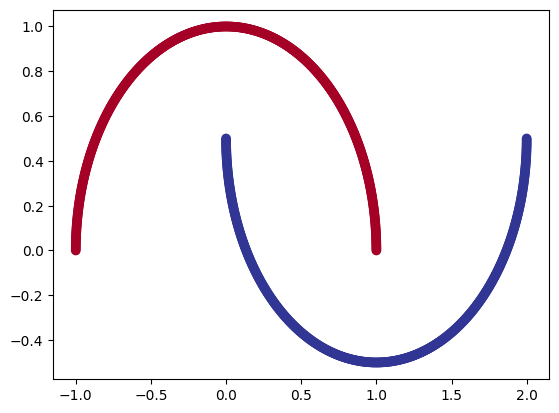

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [25]:
X.shape, y.shape

((1000, 2), (1000,))

In [26]:
X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max(), y.min(), y.max()

(-1.0, 2.0, -0.4999950454033061, 0.9999950454033061, 0, 1)

So... we have a list of 100 points (x-vals -1 to 2, y-vals -.5 to 1) that belong to two different lines.

Let's build a model to predict which line a given point belongs to. Because we have two options, we can approach this as a binary classification problem.

In [44]:
# first, we need normalized data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
col_transform = make_column_transformer((MinMaxScaler(), (0, 1)))
col_transform.fit(X)
X_norm = col_transform.transform(X)
X_norm[:, 0].min(), X_norm[:, 0].max(), X_norm[:, 1].min(), X_norm[:, 1].max(), X_norm.shape

(0.0, 1.0, 0.0, 1.0, (1000, 2))

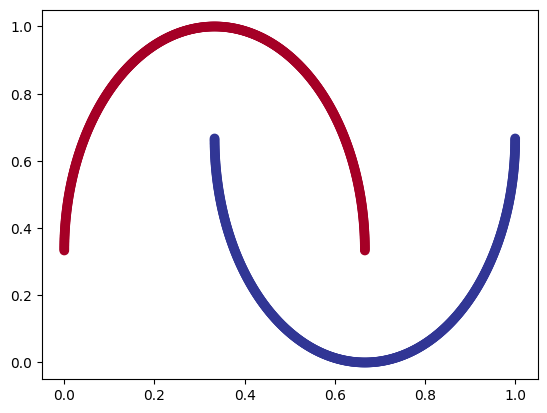

In [45]:
# plot to make sure we've done it correctly
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [52]:
# split into train and test data
from sklearn.model_selection import train_test_split
train_data, test_data, \
train_labels, test_labels = train_test_split(X_norm,
                                             y,
                                             random_state=42,
                                             test_size=.2)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((800, 2), (800,), (200, 2), (200,))

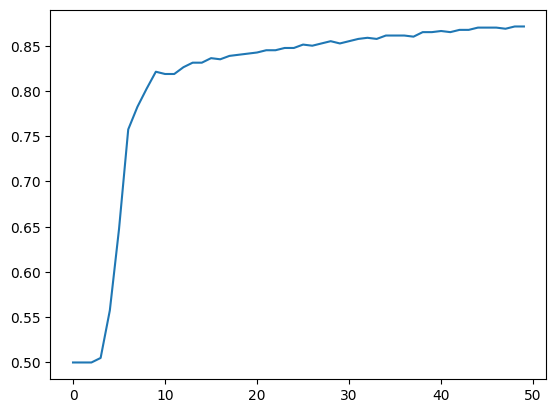

In [54]:
# let's get to modelling!
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(4, activation="relu"))
model_1.add(tf.keras.layers.Dense(4, activation="relu"))
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                      train_labels,
                      epochs=50,
                      verbose=0,
                      validation_data=(test_data, test_labels))

plt.plot(history_1.history["accuracy"])

7/7 [==============================] - 0s 7ms/step


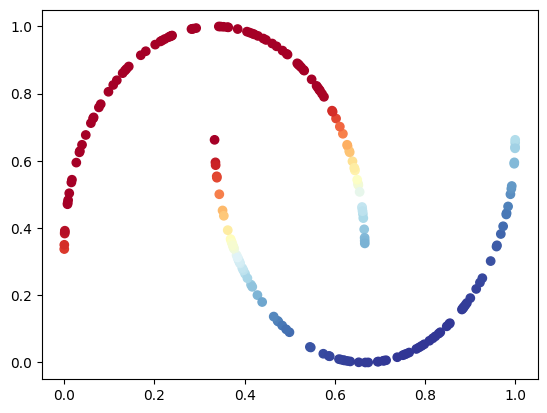

In [55]:
# looks like it's over 85%... let's plot some predictions
model_1_preds = model_1.predict(test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=model_1_preds, cmap=plt.cm.RdYlBu)

It's basically just chopping off the ends of each line and attributing it to the other line... feels bad 😞

Further improvements would likely be best approached by using more hidden layers.

In [56]:
model_1.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 6ms/step - loss: 0.3529 - accuracy: 0.8700


[0.3528866469860077, 0.8700000047683716]

## Exercise 2 ✅
Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [58]:
# get our data
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [59]:
# what does this look like?
X_train[:5], y_train[:5]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,


In [61]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [62]:
X_train.min(), X_train.max(), y_train.min(), y_train.max()

(0, 255, 0, 9)

In [64]:
# normalize, and get our categories in from https://www.tensorflow.org/datasets/catalog/fashion_mnist

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

label_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress", "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle Boot"]

X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

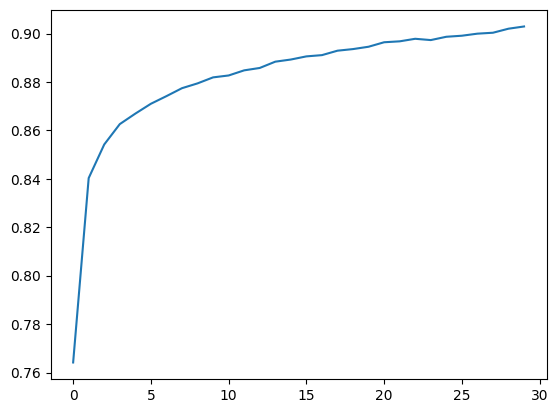

In [65]:
# since we've already visualized these in the course, I'll use the later exercises to work on visualizion
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_2.add(tf.keras.layers.Dense(20, activation="relu"))
model_2.add(tf.keras.layers.Dense(20, activation="relu"))
model_2.add(tf.keras.layers.Dense(10, activation="relu"))
model_2.add(tf.keras.layers.Dense(10, activation="softmax"))

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # this time I'm not one-hot encoding
                optimizer="Adam",
                metrics=["accuracy"])

history_2 = model_2.fit(X_train_norm,
                        y_train,
                        epochs = 30,
                        verbose=0,
                        validation_data=(X_test_norm, y_test))

import matplotlib.pyplot as plt
plt.plot(history_2.history["accuracy"])

In [67]:
model_2.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8610


[0.41020694375038147, 0.8610000014305115]

In [71]:
# just over... let's check out the confusion matrix.
from sklearn.metrics import confusion_matrix
import itertools

model_2_preds = model_2.predict(X_test_norm)
model_2_preds = tf.argmax(model_2_preds, axis=1)

matrix = confusion_matrix(y_test, model_2_preds)
matrix


313/313 [==============================] - 1s 3ms/step


array([[911,   3,  12,  11,   3,   2,  49,   0,   9,   0],
       [  6, 965,   5,  21,   2,   0,   1,   0,   0,   0],
       [ 27,   7, 818,   7,  78,   2,  61,   0,   0,   0],
       [ 57,  16,  17, 823,  47,   2,  34,   0,   4,   0],
       [  0,   4, 169,  15, 755,   0,  53,   0,   4,   0],
       [  0,   0,   0,   0,   0, 932,   0,  22,   4,  42],
       [233,   1, 110,  22,  71,   0, 555,   0,   8,   0],
       [  0,   0,   0,   0,   0,  17,   0, 916,   1,  66],
       [  4,   0,   3,  10,   7,   3,   9,   4, 958,   2],
       [  0,   0,   0,   0,   0,   2,   1,  18,   2, 977]])

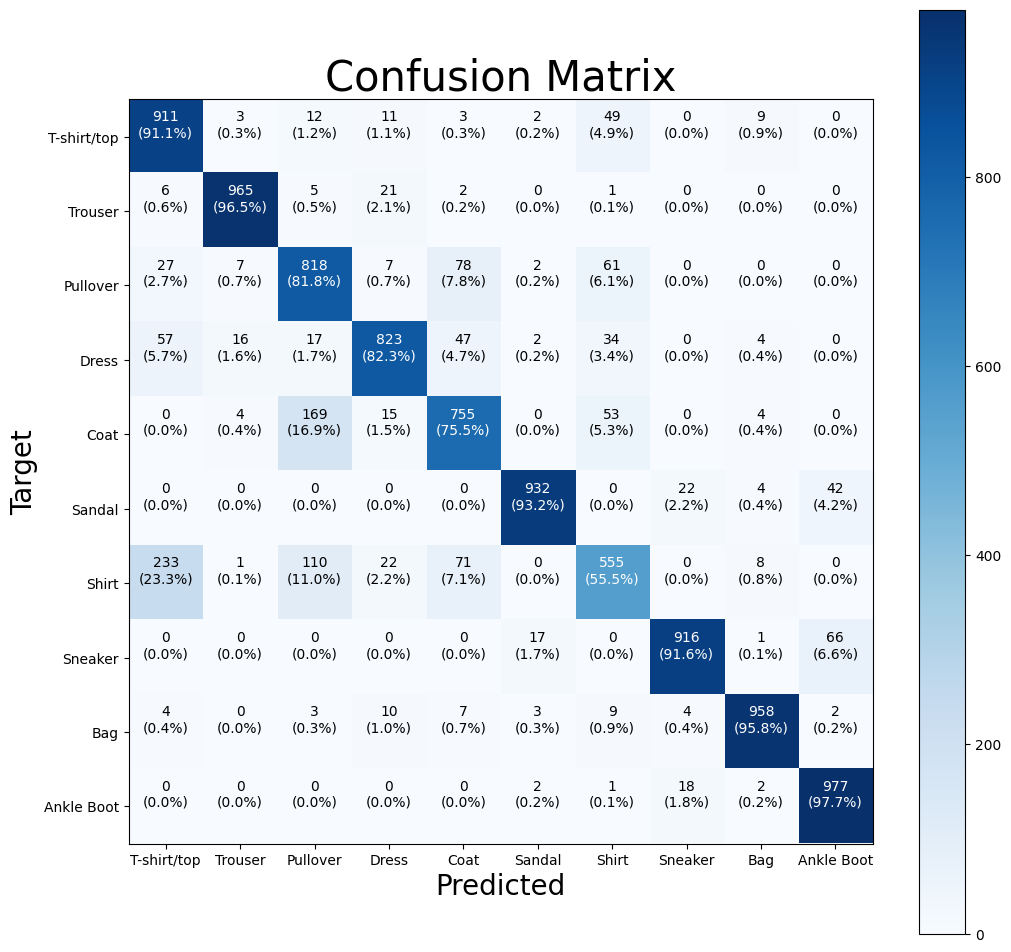

In [89]:
# make it pretty
matrix_norm = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]
n_classes = matrix.shape[0]

fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set(title="Confusion Matrix", xlabel="Predicted", ylabel="Target",
       xticks=np.arange(n_classes), yticks=np.arange(n_classes),
       xticklabels=label_names, yticklabels=label_names)
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(30)

threshold = (matrix.max() + matrix.min()) / 2

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
  plt.text(j, i, f"{matrix[i, j]}\n({matrix_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if matrix[i, j] > threshold else "black",
           size=10)

## Exercise 3 ✅
Create a function to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.

1/1 [==============================] - 0s 40ms/step


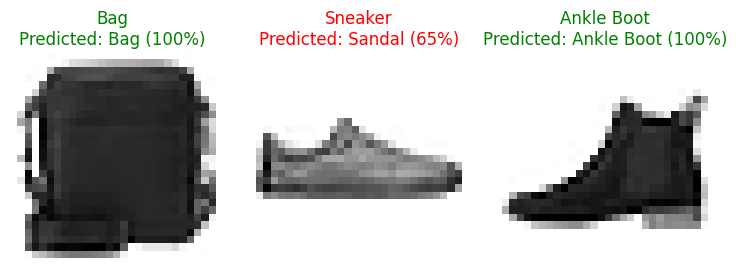

In [88]:
import random
def print_three_random(model, data, labels, label_names=label_names):
  plt.figure(figsize=(9, 3))
  for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    ax.axis("off")
    rand_index = random.choice(range(len(test_data)))

    pred_prob = model.predict(data[rand_index].reshape(1, 28, 28))
    pred_label = label_names[pred_prob.argmax()]
    true_label = label_names[labels[rand_index]]

    if pred_label == true_label:
      color = "green"
    else:
      color="red"

    plt.imshow(data[rand_index], cmap=plt.cm.binary)
    plt.title("{}\nPredicted: {} ({:2.0f}%)".format(true_label,
                                                    pred_label,
                                                    100*tf.reduce_max(pred_prob)),
              color=color)

print_three_random(model_2, X_test_norm, y_test)

## Exercise 4 ✅
Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

1/1 [==============================] - 0s 21ms/step


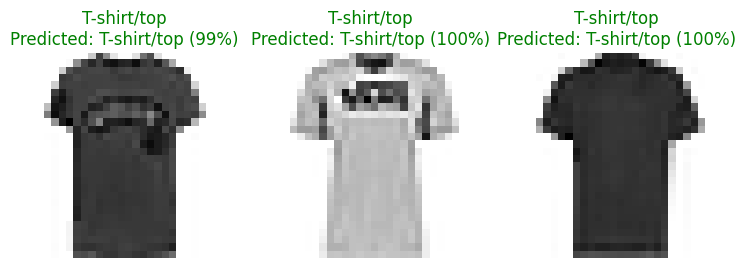

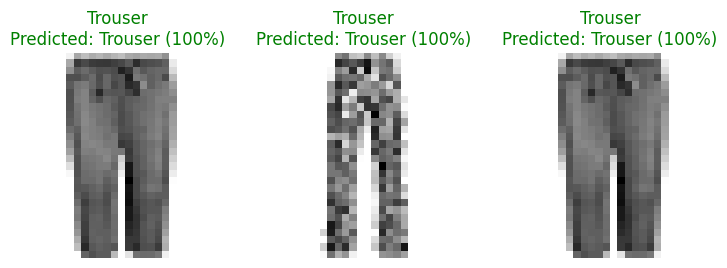

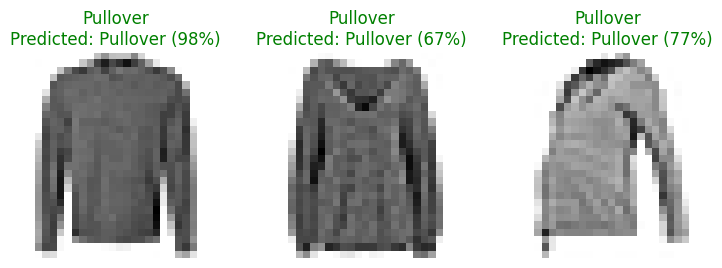

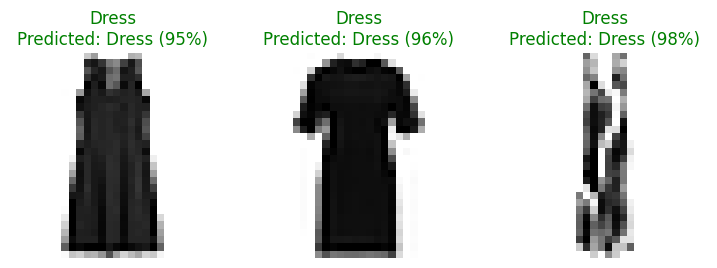

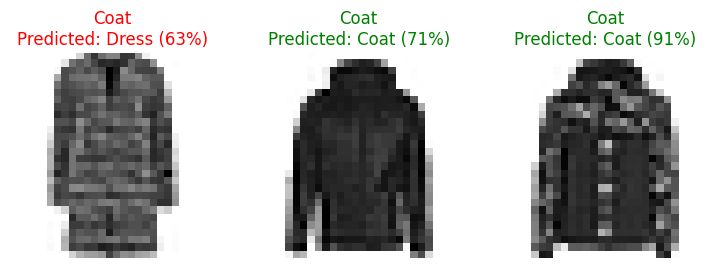

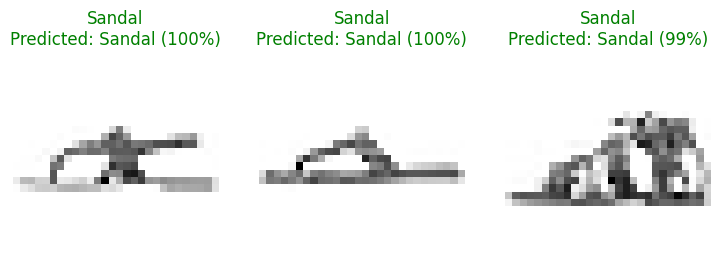

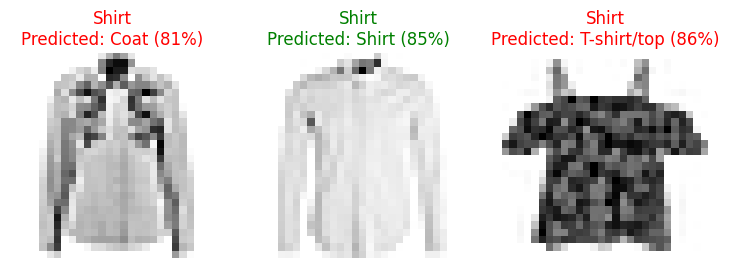

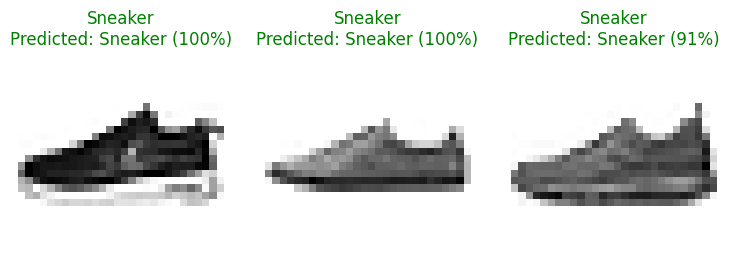

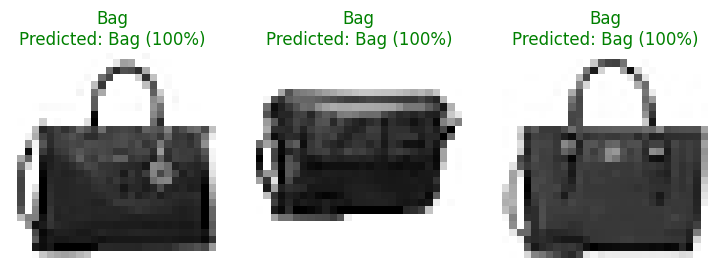

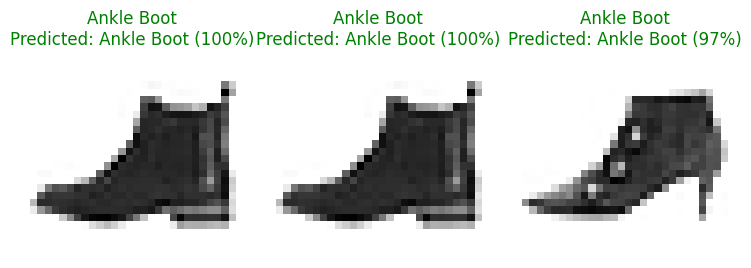

In [99]:
def print_sample_predictions(model, data, labels, label_names=label_names, target_label=0):
  plt.figure(figsize=(9, 3))
  for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    ax.axis("off")
    true_label_index = -1
    while true_label_index != target_label:
      rand_index = random.choice(range(len(test_data)))
      true_label_index = labels[rand_index]
    true_label = label_names[true_label_index]
    pred_prob = model.predict(data[rand_index].reshape(1, 28, 28))
    pred_label = label_names[pred_prob.argmax()]

    if pred_label == true_label:
      color = "green"
    else:
      color="red"

    plt.imshow(data[rand_index], cmap=plt.cm.binary)
    plt.title("{}\nPredicted: {} ({:2.0f}%)".format(true_label,
                                                    pred_label,
                                                    100*tf.reduce_max(pred_prob)),
              color=color)

print_sample_predictions(model_2, X_test_norm, y_test)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=1)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=2)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=3)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=4)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=5)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=6)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=7)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=8)
print_sample_predictions(model_2, X_test_norm, y_test, target_label=9)